                                                    ALGORITHM-3 
                                              * DECISION TREE CLASSIFIER *
                                              
                                              DATASET- STUDENT_PERFORMANCE
                                                
                                                   RA1811003040243
                                                   RA1811003040088
                                                   RA1811003040159
                                                   
                                                   III CSE 'D'

CREATING THE DATAFRAME AND MAKING ALL THE NECESSARY CHANGES IN DATAFRAME REQUIRED FOR SUCCESSFUL IMPLEMENTATION OF DECISION TREE ALGORITHM

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import numpy as np

df=pd.read_csv('student.csv')


In [2]:
from numpy import nan

df[['Math score','Reading score','Writing score']]=(df[['Math score','Reading score','Writing score']]).replace(0,nan)


In [3]:
df.fillna(df.mean(), inplace=True)
df.head()

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72.000000,72.0,74.0
1,female,group C,some college,standard,completed,69.000000,90.0,88.0
2,female,group B,master's degree,standard,none,90.000000,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.000000,57.0,44.0
4,male,group C,some college,standard,none,66.081301,78.0,75.0


In [4]:
df['Math score']=df['Math score'].astype(int)
df['Reading score']=df['Reading score'].astype(int)
df['Writing score']=df['Writing score'].astype(int)

In [5]:
df

,Gender,Race/Ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,66,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,69,65
998,female,group D,some college,standard,completed,68,78,77


# DECISION TREE ALGORITHM IMPLEMENTATION OF THE DATASET

                                CLASSIFYING THE STUDENT AS Pass OR Fail (PassStatus AS THE CLASSFIFIER LABEL)

In [6]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import graphviz

In [9]:
passmark = 40
df['PassStatus'] = np.where((df['Math score']+df['Reading score']+df['Writing score'])/3<passmark, 'F', 'P')
df.PassStatus.value_counts()

P    971
F     29
Name: PassStatus, dtype: int64

In [10]:
a = {'group A': 0, 'group B': 1, 'group C': 2,'group D': 3,'group E': 4}
df["Race/Ethnicity"]=df["Race/Ethnicity"].map(a)

In [12]:
b= {"high school": 0, "some college": 1, "associate's degree": 2,"bachelor's degree": 3,"master's degree": 4}
df["Parental level of education"]=df["Parental level of education"].map(b)

In [13]:
d = {'standard': 0, 'free/reduced': 1}
df["Lunch"]=df["Lunch"].map(d)

In [14]:
c={'none':0,'completed':1}
df["Test preparation course"]=df["Test preparation course"].map(c)

In [15]:
e={'female':0,'male':1}
df["Gender"]=df["Gender"].map(e)

In [16]:
f={'F':0, 'P':1}
df['PassStatus']=df['PassStatus'].map(f)

In [17]:
features=['Race/Ethnicity','Lunch','Parental level of education','Test preparation course','Gender','Math score','Reading score','Writing score']

In [18]:
x=df[features]
y=df['PassStatus']

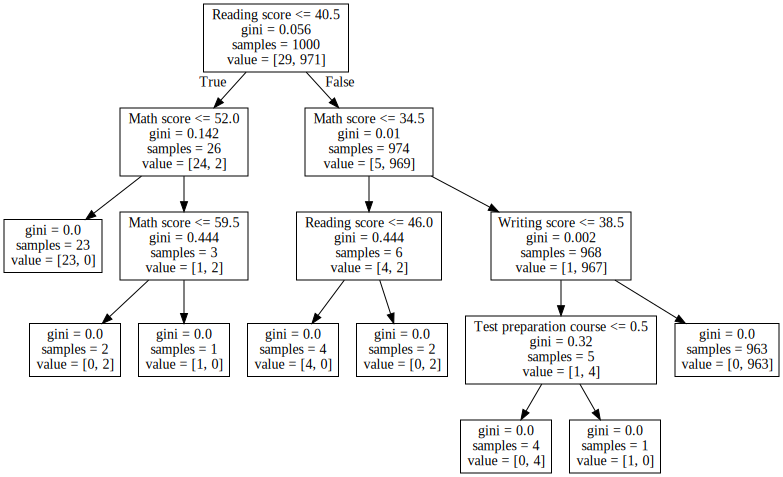

In [19]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = graphviz.Source(data)
graph

In [21]:
#predecting passStatus by giving some input to decision tree

print(dtree.predict([[4,1,1,0,0,80,90,70]])) #1=pass,0=fail

[1]
